# 1. Importing necessary lib
---
The following library are needed:
1. Keras
2. Numpy

In [18]:
from keras.datasets import imdb
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [19]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [20]:
print(train_labels)

[1 0 0 ... 0 1 0]


In [21]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 3s 57ms/step - loss: 0.5129 - acc: 0.7880 - val_loss: 0.3852 - val_acc: 0.8715
Epoch 2/4
30/30 [==============================] - 1s 35ms/step - loss: 0.3026 - acc: 0.9017 - val_loss: 0.3002 - val_acc: 0.8911
Epoch 3/4
30/30 [==============================] - 1s 27ms/step - loss: 0.2190 - acc: 0.9273 - val_loss: 0.3391 - val_acc: 0.8574
Epoch 4/4
30/30 [==============================] - 1s 25ms/step - loss: 0.1733 - acc: 0.9432 - val_loss: 0.2832 - val_acc: 0.8880


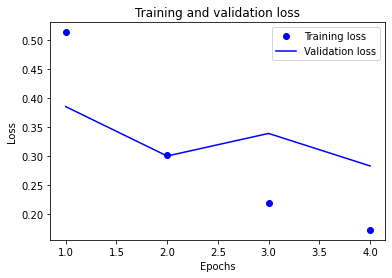

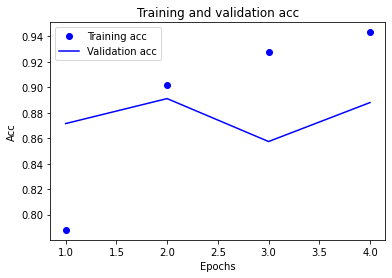

In [25]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [26]:
results = model.evaluate(x_test, y_test)
print(f"Accuracy: {results[1] * 100}%")

782/782 [==============================] - 4s 4ms/step - loss: 0.3053 - acc: 0.8763
Accuracy: 87.62800097465515%


# 2. Hyperparameter comparison
---

In [7]:
def create_model(layer=2,neurons=16):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation='relu', input_shape=(10000,)))
    for i in range(layer-1):
        model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6101 - acc: 0.6341 - val_loss: 0.5577 - val_acc: 0.7686
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5114 - acc: 0.8093 - val_loss: 0.5095 - val_acc: 0.8062
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4591 - acc: 0.8711 - val_loss: 0.4833 - val_acc: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4202 - acc: 0.9088 - val_loss: 0.4573 - val_acc: 0.8758
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3886 - acc: 0.9291 - val_loss: 0.4437 - val_acc: 0.8762
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3597 - acc: 0.9457 - val_loss: 0.4352 - val_acc: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3340 - acc: 0.9572 - val_loss: 0.4323 - val_acc: 0.8759
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3114 - a

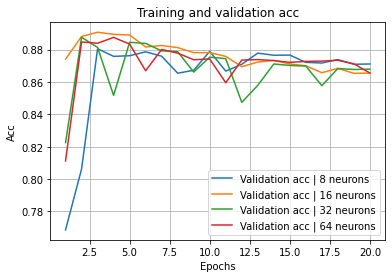

In [22]:


model_list = []
for neurons in [8,16,32,64]:

    model_test = create_model(layer=2,neurons=neurons)
    model_test.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

    history_test = model_test.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

    history_dict_test = history_test.history
    loss_values = history_dict_test['loss']
    val_loss_values = history_dict_test['val_loss']

    acc_values = history_dict_test['acc']
    val_acc_values = history_dict_test['val_acc']

    plt.plot(epochs, val_acc_values, label=f'Validation acc | {neurons} neurons')

plt.grid()
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5041 - acc: 0.8035 - val_loss: 0.3997 - val_acc: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3288 - acc: 0.8986 - val_loss: 0.3281 - val_acc: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2560 - acc: 0.9199 - val_loss: 0.2949 - val_acc: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2107 - acc: 0.9344 - val_loss: 0.2809 - val_acc: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1788 - acc: 0.9439 - val_loss: 0.2857 - val_acc: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1544 - acc: 0.9546 - val_loss: 0.2762 - val_acc: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1347 - acc: 0.9605 - val_loss: 0.2799 - val_acc: 0.8881
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1186 - a

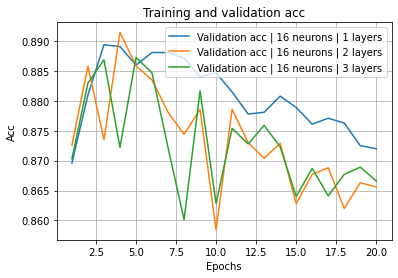

In [10]:
for l in [1,2,3]:

    model_test = create_model(layer=l,neurons=16)
    model_test.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

    history_test = model_test.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

    history_dict_test = history_test.history
    loss_values = history_dict_test['loss']
    val_loss_values = history_dict_test['val_loss']

    acc_values = history_dict_test['acc']
    val_acc_values = history_dict_test['val_acc']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, val_acc_values, label=f'Validation acc | 16 neurons | {l} layers')

plt.grid()
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()